<a href="https://colab.research.google.com/github/TerryTian21/COVID-Data-GUI/blob/main/JSC_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf 

#Data

In [19]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
income_df = pd.read_csv(path)
income_df.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# Initial Data Exploration

## Analyzing Columns
- From the following code observe a sample of the dataset by looking at the first 10 row
- There are a total of 14 columns 
- The data types for each column match the description outlined in [data](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

DataTypes 

- Age, Captial Gain, Capital Loss and Hours per week are type int64 -> Continuous Data
- The rest of the data is type Object which implies strings and consistent as they are categorical data

In [24]:
income_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [25]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32560 non-null  int64 
 1   workclass           32560 non-null  object
 2   fnlwgt              32560 non-null  int64 
 3   education           32560 non-null  object
 4   education_num       32560 non-null  int64 
 5   marital_status      32560 non-null  object
 6   occupation          32560 non-null  object
 7   relationship        32560 non-null  object
 8   race                32560 non-null  object
 9   sex                 32560 non-null  object
 10  capital_gain        32560 non-null  int64 
 11  capital_loss        32560 non-null  int64 
 12  hours_per_week      32560 non-null  int64 
 13  native_country      32560 non-null  object
 14  gross_income_group  32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Missing Data
- Observe the next code section which displays the NaN data for each column.
- Notice how there are no values explicitly labelled as Nan or Null

In [46]:
income_df.isna().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education_num         0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country        0
gross_income_group    0
dtype: int64

- However if we manually look through the dataset, we observe '?' values, which we take to be missing.
- Notice how : workclass, occupation, and native_country have 1836, 1843 and 583 null values respectively

In [47]:
# Find the number of ? in each column
count_question_marks = lambda col: col.astype(str).str.count('\?').sum()
income_df.apply(count_question_marks)

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

In [53]:
income_df = income_df.replace(' ?', np.NaN)
income_df.isna().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

##Plotting Distributions 

- From the following graphs, we see there is a high concentration of 


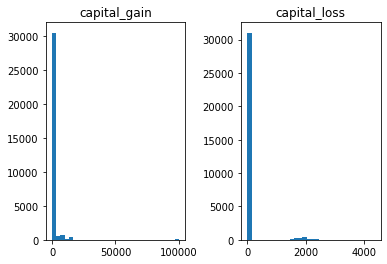

In [57]:
capital = income_df[['capital_gain', 'capital_loss']]
capital.hist(bins=30, grid=False)
plt.subplots_adjust(hspace=0.7, wspace=0.4)